# Mielage Prediction - Regression Analysis
The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes.

# Import required libraries

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
import seaborn as sns

In [7]:
import matplotlib.pyplot as plt

# Importing the Dataset

In [8]:
df = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/MPG.csv')

In [9]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [10]:
df.shape

(398, 9)

In [11]:
df.nunique()

mpg             129
cylinders         5
displacement     82
horsepower       93
weight          351
acceleration     95
model_year       13
origin            3
name            305
dtype: int64

# Data Pre-Processing

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [13]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [14]:
# Removing missing values
df = df.dropna()

In [15]:
df.corr()

<ipython-input-15-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
model_year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


<ipython-input-16-6dc1c4c1753e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

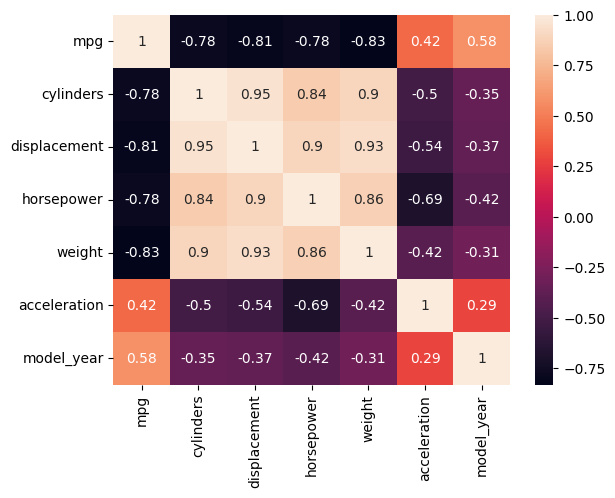

In [16]:
sns.heatmap(df.corr(), annot=True)

# Data Visualization

In [17]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

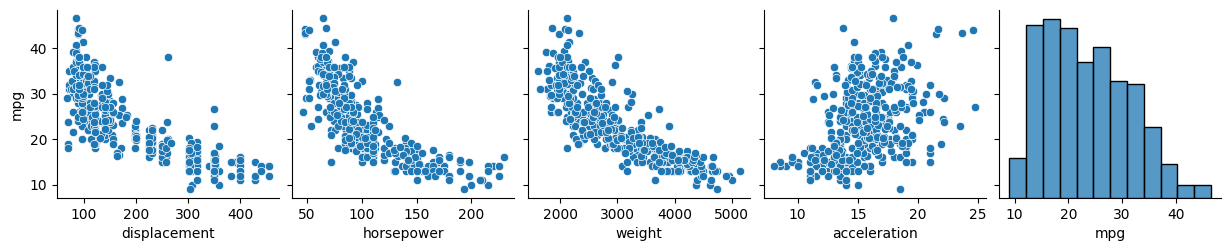

In [18]:
sns.pairplot(data = df, x_vars = ['displacement', 'horsepower', 'weight',
       'acceleration', 'mpg'], y_vars = ['mpg'])

<Axes: xlabel='displacement', ylabel='mpg'>

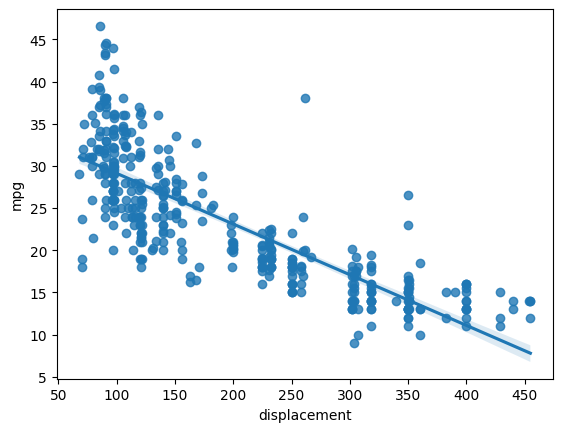

In [19]:
sns.regplot(data = df, x = 'displacement', y ='mpg')

# Define Target Variable (y) and Feature Variables (X)

In [20]:
x = df[['displacement', 'horsepower', 'weight','acceleration']]

In [21]:
y = df['mpg']

# Data Scaling

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
ss = StandardScaler()

In [24]:
x = ss.fit_transform(x)

In [25]:
x

array([[ 1.07728956,  0.66413273,  0.62054034, -1.285258  ],
       [ 1.48873169,  1.57459447,  0.84333403, -1.46672362],
       [ 1.1825422 ,  1.18439658,  0.54038176, -1.64818924],
       ...,
       [-0.56847897, -0.53247413, -0.80463202, -1.4304305 ],
       [-0.7120053 , -0.66254009, -0.41562716,  1.11008813],
       [-0.72157372, -0.58450051, -0.30364091,  1.40043312]])

# Train_Test_Split

In [26]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.30)

# Linear Regression Model

In [41]:
from sklearn.linear_model import LinearRegression

In [42]:
lr = LinearRegression()

In [43]:
lr.fit(X_train, y_train)

LinearRegression()

In [44]:
lr.intercept_

23.618631783658625

In [45]:
lr.coef_

array([-0.43331795, -1.90593452, -4.50067928, -0.14464968])

# Regression Line
# y = 23.62 - 0.43*x1 - 1.91*x2 - 4.5*x3 - 0.14*x4

# Prediction

In [46]:
y_pred = lr.predict(X_test)

In [47]:
y_pred

array([29.59567766, 31.972259  , 32.29643186, 26.64791804, 30.94420955,
       29.67505192, 29.58071703, 30.89433533, 26.87560208, 30.91744903,
       10.92244164, 22.36573156, 29.13598829, 31.06560236, 23.27062634,
       17.14825272, 27.45832994, 30.43996191, 24.4712989 , 21.9030819 ,
       16.52260517, 26.53360813,  8.96874664, 31.10121964, 26.79646834,
       30.12487002, 29.48763058, 26.20934047, 28.87485351, 26.05509873,
       28.22269489, 26.03478582, 18.10340558, 20.027324  , 17.44913848,
       14.30825987, 27.53968536, 13.28624975, 27.37309426,  8.81310301,
       27.90133607, 31.08354211, 27.29235697, 27.65979693, 13.09858549,
       23.52782948, 28.27063085, 26.85410059, 21.22606911, 18.89981933,
       30.19522278, 23.99763623, 29.58898137, 24.84249053, 22.41766225,
       32.99533181, 21.81557003, 22.56302677, 29.05530937, 14.40275751,
       29.50121727, 30.92891538, 29.75521864, 30.12266574, 32.11289851,
       22.86522525, 24.57794547, 30.3921872 , 16.8052375 , 25.95

In [48]:
# Now Check the accuracy of the model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [53]:
mae = mean_absolute_error(y_test, y_pred)
mae

3.2742583802649157

In [54]:
mse = mean_squared_error(y_test, y_pred)
mse

17.03871543670385

In [55]:
accuracy = r2_score(y_test, y_pred)
accuracy

0.683977628322997

# Explanation
**In this we can see that accuracy is law and if we observe our data then it is like little curve form so we can also apply PolyNomial Regression to increase the accuracy of the model..**
So Let's try this...

# Polynomial Regression

In [56]:
from sklearn.preprocessing import PolynomialFeatures

In [76]:
poly = PolynomialFeatures(degree = 2)

In [77]:
X_train2 = poly.fit_transform(X_train)

In [78]:
X_test2 = poly.fit_transform(X_test)

In [79]:
lr.fit(X_train2, y_train)

LinearRegression()

In [80]:
lr.intercept_

21.393584959685757

In [81]:
lr.coef_

array([ 0.        , -1.86823595, -4.49300147, -2.37164333, -0.7729243 ,
        0.05349608,  2.21559619,  0.20346174,  1.33783871, -1.62064646,
        2.4961998 , -1.9891294 , -0.75590652,  1.3139518 ,  0.06631219])

In [82]:
y_pred_poly = lr.predict(X_test2)
y_pred_poly

array([30.93717974, 35.31180377, 32.46188746, 25.78232129, 31.80610527,
       29.01112431, 30.03689893, 31.895391  , 26.58321068, 31.51485132,
       13.13747629, 20.41198733, 28.62617144, 33.00960123, 20.06099311,
       18.0601219 , 26.94976724, 31.32637974, 24.36534486, 21.57613964,
       15.20360554, 25.45683222, 14.61947809, 32.34476325, 27.4985689 ,
       32.3603504 , 31.17155834, 25.67967206, 29.96434763, 24.73652095,
       26.10424036, 25.56200771, 16.02427114, 19.47460655, 15.62388999,
       16.0221749 , 27.50310468, 13.63915069, 26.09947847, 12.59584398,
       27.15620411, 32.65747674, 27.03180882, 26.66038859, 13.71935552,
       20.59770557, 26.07766277, 26.09576039, 20.02912263, 16.14522948,
       31.16009077, 21.30155322, 31.24716722, 22.81198357, 20.71942879,
       32.47925192, 20.61880898, 20.93074949, 28.15189877, 14.63842881,
       30.31518319, 31.67691524, 30.19643456, 31.73713429, 32.80472043,
       21.3938961 , 24.12847362, 30.18893797, 15.10141915, 25.57

In [83]:
mse = mean_squared_error(y_test, y_pred_poly)
mse

14.654089382698304

In [84]:
accuracy1 = r2_score(y_test, y_pred_poly)
accuracy1

0.7282060318050021

# Accuracy is 72.82%
**That means our model prediction of mielage is 73% Accurate**